# Perform Exploratory Data Analysis on Sample Superstore Dataset

# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\H P\Downloads\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# EXPLORING BASIC INFORMATION

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


# EXPLORING THE SUMMARY STATISTICS

In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# CHECKING FOR MISSING VALUES

In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# EXPLORING THE CATEGORICAL DATA

In [6]:
print(df['Category'].value_counts())

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


In [7]:
print(df['Sub-Category'].value_counts())

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


In [8]:
# Checking on duplicate rows throughout the dataset

print('No. of Duplicate rows = ', df.duplicated().sum())

No. of Duplicate rows =  17


In [9]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# VISUALIZING THE DATASETS USING THE LIBRARIES MATPLOTLIB AND SEABORN

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

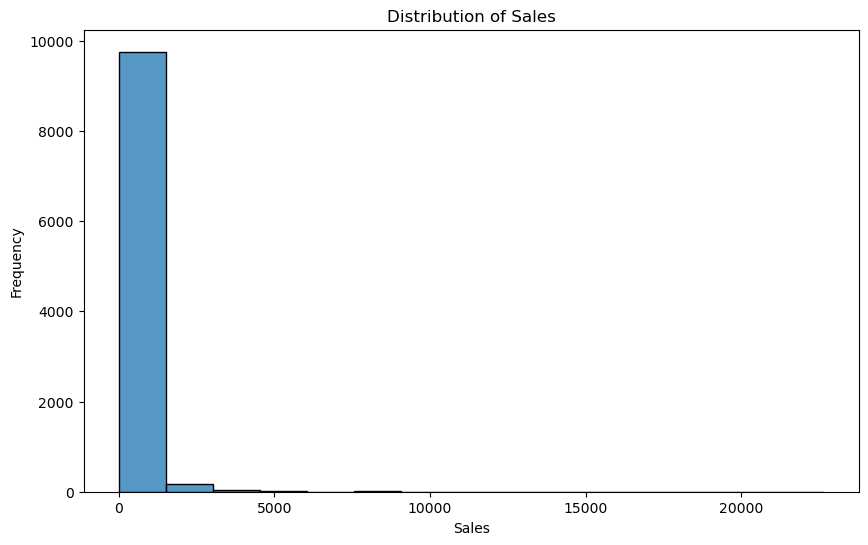

In [14]:
# Histogram of Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=15)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

# CORRELATION ANALYSIS USING HEATMAP

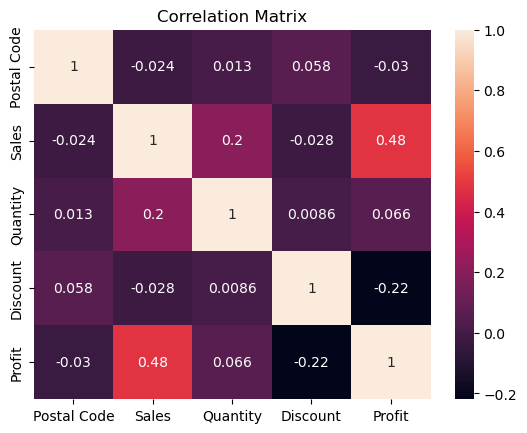

In [15]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# GEOGRAPHICAL ANALYSIS

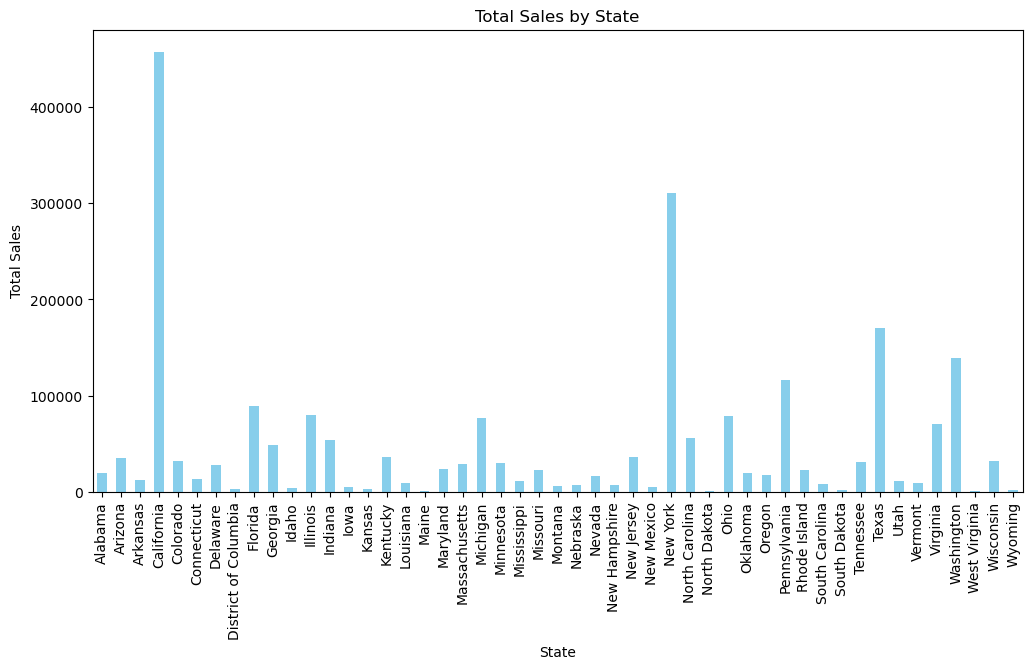

In [16]:
# Grouping the data by state and calculating total sales for each state
state_sales = df.groupby('State')['Sales'].sum()

# # Ploting the total sales by state
plt.figure(figsize=(12, 6))
state_sales.plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Total Sales by State')
plt.xticks(rotation=90)
plt.show()

# VISUAL REPRESENTATION OF SHIP CLASSES AND THEIR COUNT

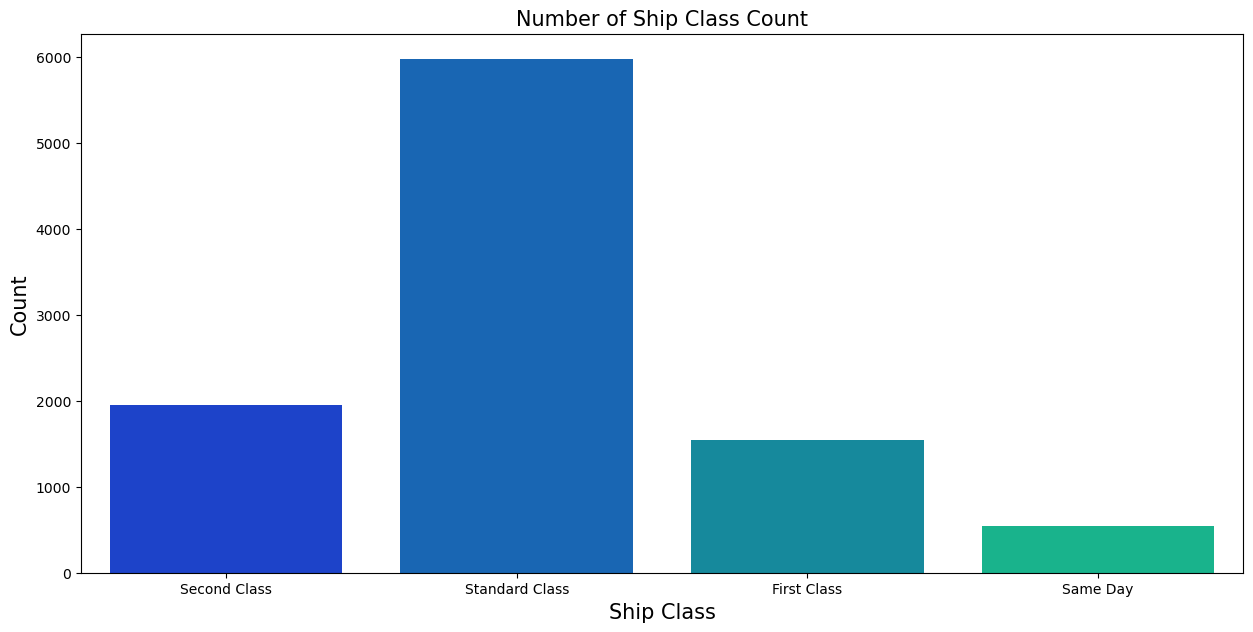

In [21]:
plt.figure(figsize=(15, 7))
sns.countplot(x = 'Ship Mode', data = df, palette = 'winter')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Ship Class', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Number of Ship Class Count', fontsize = 15)
plt.show()

# DISPLAY THE SEGMENT COUNT USING COUNTPLOT

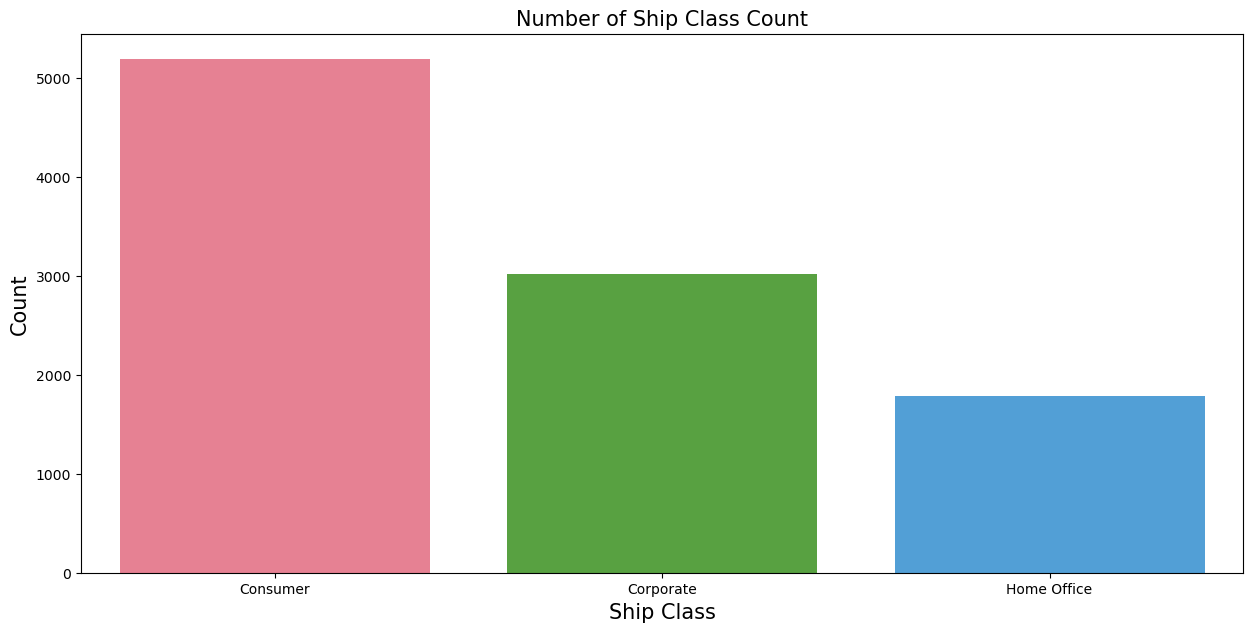

In [22]:
plt.figure(figsize=(15, 7))
sns.countplot(x = 'Segment', data = df, palette = 'husl')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Ship Class', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Number of Ship Class Count', fontsize = 15)
plt.show()

# DISPLAY THE REGION SALES USING PIE PLOT

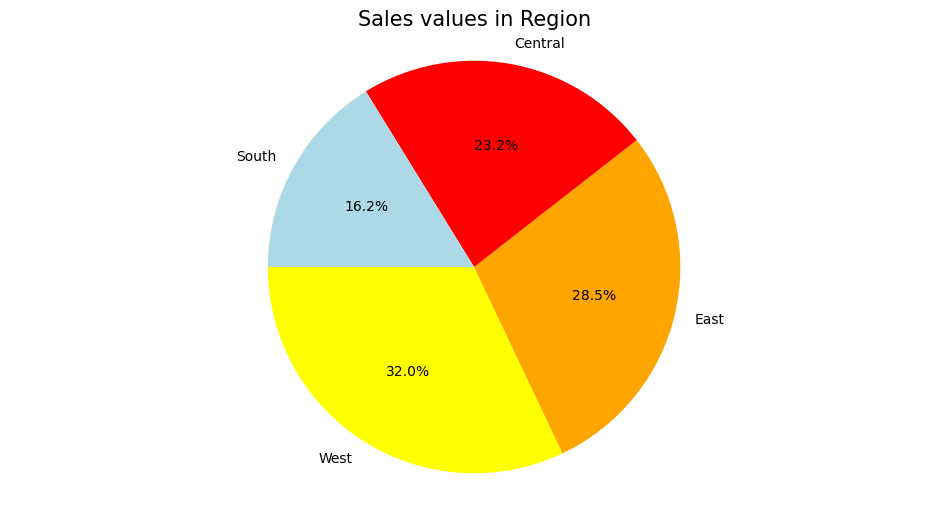

In [34]:
Region_sales = df.Region.value_counts()
labels = np.array(Region_sales.index)
sizes = Region_sales.values
color = ['yellow','orange', 'red', 'lightblue']
plt.figure(figsize = (12, 6))
plt.pie(sizes, labels = labels, colors = color, autopct = '%1.1f%%', startangle = 180)
plt.title('Sales values in Region', fontsize = 15)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()